In [1]:
import pandas as pd
celltypes = ['priB', 'MEF']
peakfiles = [
    '../analysispriB/rif1/merged/rif1_IgG1.bed', 
    '../analysisMEF/rif1/merged/rif1.bed'
]
rif1_peaks = {
    key: pd.read_csv(file, sep = '\t', names = ['chrom', 'start', 'end']) for key, file in zip(celltypes, peakfiles)
}
rif1_peaks

{'priB':       chrom      start        end
 0      chr1    4775355    4776442
 1      chr1    4796970    4797895
 2      chr1    4847376    4848912
 3      chr1    5008181    5011399
 4      chr1    5072573    5073759
 ...     ...        ...        ...
 16327  chrX  166434916  166436223
 16328  chrY     260000     380000
 16329  chrY     972000    1188000
 16330  chrY    1600000    1820000
 16331  chrY    2560000    2700000
 
 [16332 rows x 3 columns], 'MEF':      chrom      start        end
 0     chr1    3000000    4768000
 1     chr1    5160000    6176000
 2     chr1    7192000    9504000
 3     chr1    9535602    9535856
 4     chr1   10983608   10984092
 ...    ...        ...        ...
 1189  chrX  142152000  143496000
 1190  chrX  147603294  147603722
 1191  chrX  150192000  150448000
 1192  chrX  150560000  151520000
 1193  chrX  156426204  156426589
 
 [1194 rows x 3 columns]}

In [2]:
from pybedtools import BedTool
radfiles = {
    'priB': [
        '../analysispriB/rif1/edd/IgG1_r1/IgG1_r1_peaks.bed', 
        '../analysispriB/rif1/edd/IgG1_r2/IgG1_r2_peaks.bed'
    ],
    'MEF': [
        '../analysisMEF/rif1/edd/rif1_r1/rif1_r1_peaks.bed', 
        '../analysisMEF/rif1/edd/rif1_r2/rif1_r2_peaks.bed'
    ]
}

for celltype in celltypes:
    bed = BedTool().from_dataframe(
        rif1_peaks[celltype]
    )
    olap = pd.concat(
        [
            bed.intersect(
                BedTool(radfiles[celltype][i]), 
                wo = True
            ).to_dataframe() for i in range(len(radfiles[celltype]))
        ]
    )
    olap = olap.drop_duplicates(
        subset = ['chrom', 'start', 'end']
    )
    olap['peak'] = 'RAD'
    df = rif1_peaks[celltype].merge(
        olap.loc[:, ['chrom', 'start', 'end', 'peak']],
        on = ['chrom', 'start', 'end'],
        how = 'left'
    )
    df.loc[df.peak.isna(), 'peak'] = 'MACS'
    rif1_peaks[celltype] = df

rif1_peaks

{'priB':       chrom      start        end  peak
 0      chr1    4775355    4776442  MACS
 1      chr1    4796970    4797895  MACS
 2      chr1    4847376    4848912  MACS
 3      chr1    5008181    5011399  MACS
 4      chr1    5072573    5073759  MACS
 ...     ...        ...        ...   ...
 16327  chrX  166434916  166436223  MACS
 16328  chrY     260000     380000   RAD
 16329  chrY     972000    1188000   RAD
 16330  chrY    1600000    1820000   RAD
 16331  chrY    2560000    2700000   RAD
 
 [16332 rows x 4 columns], 'MEF':      chrom      start        end  peak
 0     chr1    3000000    4768000   RAD
 1     chr1    5160000    6176000   RAD
 2     chr1    7192000    9504000   RAD
 3     chr1    9535602    9535856  MACS
 4     chr1   10983608   10984092  MACS
 ...    ...        ...        ...   ...
 1189  chrX  142152000  143496000   RAD
 1190  chrX  147603294  147603722  MACS
 1191  chrX  150192000  150448000   RAD
 1192  chrX  150560000  151520000   RAD
 1193  chrX  156426204  1

In [4]:
rif1_peaks['priB'].to_csv('../priB_rif1_chip.bed', sep = '\t', index = False, header = False)

In [3]:
rif1_peaks['priB'].groupby('peak').count()

,chrom,start,end
peak,,,
MACS,16043,16043,16043
RAD,289,289,289


In [4]:
rif1_peaks['MEF'].groupby('peak').count()

,chrom,start,end
peak,,,
MACS,862,862,862
RAD,332,332,332


In [5]:
rtfiles = [
    '../buonomo/RT/results/bedGraph/WT.loess.bedGraph',
    '../analysisMEF/repliseq/repliseq-nf/bedGraph/WT.loess.bedGraph'
]
rt5kb = {
    key: pd.read_csv(
        file,
        sep = '\t',
        names = ['chrom', 'start', 'end', 'rt']    
    ) for key, file in zip(celltypes, rtfiles)
}
rt5kb

{'priB':        chrom      start        end        rt
 0       chr1          0    3000000 -0.606838
 1       chr1    3000000    3005000 -3.568588
 2       chr1    3005000    3010000 -3.531845
 3       chr1    3010000    3015000 -3.494933
 4       chr1    3015000    3020000 -3.457851
 ...      ...        ...        ...       ...
 508102  chrX  166610000  166615000  0.588469
 508103  chrX  166615000  166620000  0.579927
 508104  chrX  166620000  166625000  0.570874
 508105  chrX  166625000  166630000  0.561314
 508106  chrX  166630000  166650296  0.551250
 
 [508107 rows x 4 columns], 'MEF':        chrom      start        end        rt
 0       chr1          0    3000000 -0.409592
 1       chr1    3000000    3005000 -2.755777
 2       chr1    3005000    3010000 -2.745078
 3       chr1    3010000    3015000 -2.734309
 4       chr1    3015000    3020000 -2.723471
 ...      ...        ...        ...       ...
 502303  chrX  166440000  166445000  0.631095
 502304  chrX  166445000  166450000 

In [6]:
data = pd.DataFrame(
    columns = ['chrom', 'start', 'end', 'peak', 'rt', 'celltype']
)
for celltype in celltypes:
    rads = BedTool().from_dataframe(rif1_peaks[celltype])
    rt = BedTool().from_dataframe(rt5kb[celltype])
    olap = rads.intersect(rt, wo = True).to_dataframe()
    olap = olap.loc[:, ['chrom', 'start', 'end', 'name', 'thickEnd']]
    olap['celltype'] = celltype
    olap.rename(
        columns = {
            'name': 'peak',
            'thickEnd': 'rt'
        },
        inplace = True
    )
    data = pd.concat(
        [data, olap]
    )
data

,chrom,start,end,peak,rt,celltype
0,chr1,4775355,4776442,MACS,0.235272,priB
1,chr1,4796970,4797895,MACS,0.164141,priB
2,chr1,4847376,4848912,MACS,-0.238992,priB
3,chr1,5008181,5011399,MACS,-1.276067,priB
4,chr1,5008181,5011399,MACS,-1.306262,priB
...,...,...,...,...,...,...
164983,chrX,150560000,151520000,RAD,-3.204513,MEF
164984,chrX,150560000,151520000,RAD,-2.120758,MEF
164985,chrX,150560000,151520000,RAD,-1.974197,MEF
164986,chrX,150560000,151520000,RAD,-3.584996,MEF


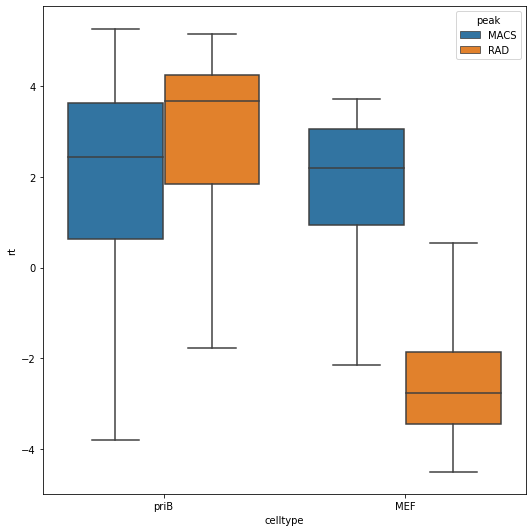

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots()
sns.boxplot(
    x = 'celltype',
    y = 'rt',
    hue = 'peak',
    data = data,
    showfliers = False,
    ax = ax
)
fig.set_figheight(7.5)
fig.set_figwidth(7.5)
fig.tight_layout()
fig.savefig('rt_boxplot.pdf')

In [11]:
from pybedtools import BedTool

def unique_str(x):
    x = set(x.split(';'))
    if not len(x) > 1:
        return x.pop()
    
    else:
        # print('ambiguous', ';'.join(x))
        return 'ambiguous'

def process_txn(txn):
    txn.loc[:, 'chr'] = txn.chr.apply(unique_str)
    txn.loc[:, 'strand'] = txn.strand.apply(unique_str)
    txn.loc[:, 'start'] = txn.start.apply(
        lambda x: min(int(i) for i in x.split(';'))
    )
    txn.loc[:, 'end'] = txn.end.apply(
        lambda x: max(int(i) for i in x.split(';'))
    )
    return txn

genes = pd.read_csv(
    '/groups/pavri/bioinfo/mihaela/RNASeq/count/CH12_RNASeq.count',
    sep = '\t',
    comment = '#'
)
genes.columns = ['gene_name', 'chr', 'start', 'end', 'strand', 'length'] + genes.columns[6:].to_list() 
genes = process_txn(genes)
genes = genes.drop(
    index = genes[genes.chr.str.startswith('ambiguous')].index
)
genes = genes.loc[genes.chr.str.startswith('chr'), ['chr', 'start', 'end', 'gene_name']]
genes = genes.sort_values(by = ['chr', 'start', 'end'])
genes

,chr,start,end,gene_name
20773,chr1,3204563,3661579,Xkr4
4846,chr1,4109947,4399322,Rp1
11156,chr1,4481009,4487435,Sox17
3313,chr1,4763279,4775807,Mrpl15
15883,chr1,4797904,4836816,Lypla1
...,...,...,...,...
1828,chrY_random,29419583,38091071,Gm20858
22229,chrY_random,31138726,54491766,Gm21292
14599,chrY_random,32818621,53820453,Gm20806
3381,chrY_random,54420149,54423069,Gm20815


In [12]:
frame_rows = []
for _, row in genes.iterrows():
    tss = [row.chr, row.start - 1000, row.start + 1000, 'TSS', row.gene_name]
    frame_rows.append(tss)
    if row.end - row.start > 1000:
        gene_body = [row.chr, row.start + 1000, row.end, 'gene_body', row.gene_name]
        frame_rows.append(gene_body)

    
genomic_regions = pd.DataFrame(
    frame_rows,
    columns = ['chr', 'start', 'end', 'regions', 'gene_name']
)
genomic_regions

,chr,start,end,regions,gene_name
0,chr1,3203563,3205563,TSS,Xkr4
1,chr1,3205563,3661579,gene_body,Xkr4
2,chr1,4108947,4110947,TSS,Rp1
3,chr1,4110947,4399322,gene_body,Rp1
4,chr1,4480009,4482009,TSS,Sox17
...,...,...,...,...,...
47883,chrY_random,32819621,53820453,gene_body,Gm20806
47884,chrY_random,54419149,54421149,TSS,Gm20815
47885,chrY_random,54421149,54423069,gene_body,Gm20815
47886,chrY_random,55232648,55234648,TSS,Gm21064


In [30]:
genomic_bed = BedTool().from_dataframe(genomic_regions)
aggs = []
for celltype in celltypes:
    df = rif1_peaks[celltype]
    a = BedTool().from_dataframe(df)
    olap = a.intersect(
        genomic_bed,
        wo = True
    ).to_dataframe(
        names = df.columns.to_list() + ['chrom1', 'start1', 'end1'] + genomic_regions.columns[3:].to_list() + ['olap']
    )
    
    intergenic = a.subtract(genomic_bed).to_dataframe(
        names = df.columns.to_list()
    )
    
    intergenic['chrom1'] = intergenic['chrom']
    intergenic['start1'] = intergenic['start']
    intergenic['end1'] = intergenic['end']
    intergenic['regions'] = 'intergenic'
    intergenic['gene_name'] = '.'
    intergenic['olap'] = intergenic.end - intergenic.start
    
    df = pd.concat([olap, intergenic])
    df['celltype'] = celltype
    agg = df.groupby(['peak', 'regions']).agg({'olap': 'sum'}).reset_index()
    for peak in agg.peak.unique():
        agg.loc[agg.peak == peak, 'olap'] = agg.loc[agg.peak == peak, 'olap'] / agg.loc[agg.peak == peak, 'olap'].sum() * 100
        
    agg['celltype'] = celltype
    aggs.append(agg)

data = pd.concat(aggs)
data

,peak,regions,olap,celltype
0,MACS,TSS,18.927059,priB
1,MACS,gene_body,50.784163,priB
2,MACS,intergenic,30.288779,priB
3,RAD,TSS,4.589965,priB
4,RAD,gene_body,49.284043,priB
5,RAD,intergenic,46.125992,priB
0,MACS,TSS,33.024944,MEF
1,MACS,gene_body,49.175048,MEF
2,MACS,intergenic,17.800008,MEF
3,RAD,TSS,0.761799,MEF


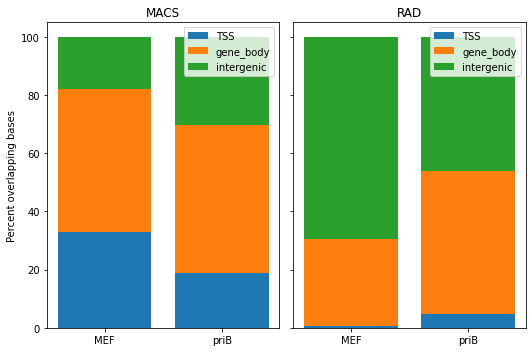

In [39]:
import numpy as np
fig, axs = plt.subplots(1, 2, sharey = True)
for ax, peaktype in zip(axs, ['MACS', 'RAD']):
    heights = np.zeros(shape = 2)
    for olap_type, zorder in zip(['TSS', 'gene_body', 'intergenic'], range(3, 0, -1)):
        feature_data = data.loc[
            (data.peak == peaktype) & (data.regions == olap_type), 
            ['olap', 'celltype']
            
        ].sort_values(
            by = 'celltype'
        )
        
        heights += feature_data.olap.values
        ax.bar(
            x = [0, 1],
            height = heights,
            zorder = zorder,
            label = olap_type
        )
        
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['MEF', 'priB'])
    ax.set_title(peaktype)

axs[0].set_ylabel('Percent overlapping bases')
fig.set_figwidth(7.5)
fig.set_figheight(5)
fig.tight_layout()
fig.savefig('percent_overlapping_bases_rifpeaks.pdf')

In [6]:
import pyBigWig as pb
import numpy as np

conditions = ['shLacZ', 'shMcm', 'Rif1ko', 'Rif1ko_shMcm']
rtconds = {
    'shLacZ': 'shLacZ', 
    'shMcm': 'shMcm', 
    'Rif1ko': 'Rif1ko_shLacZ', 
    'Rif1ko_shMcm': 'Rif1ko_shMcm', 
}

def read_bg_and_add_bw(bg, bw):
    df = pd.read_csv(bg, 
                     header = None,
                     usecols = [0, 1, 2, 3],
                     names = ['chrom', 'start', 'end', 'domain'],
                     sep = '\t')
    
    bw = pb.open(bw)
    
    def get_mean_bw_value(x, bw):
        intervals = bw.intervals(x['chrom'], x['start'], x['end'])
        values = np.array([i[-1] for i in intervals])
        return values.mean()
    
    df['bw_value'] = df.apply(get_mean_bw_value, axis = 1, bw = bw)
    return df


def assign_domain_names(df, names, split_domain = {}):
    '''
    names has to contain the expected domain names in the order from low value to high value
    split_domains takes a dictionary with the domain_names as keys and a tuple containing 
    (split_value, smaller_split_name, greater_split_name)
    '''
    domains = []
    for domain, group in df.groupby('domain'):
        domains.append((group.bw_value.mean(), domain))
    
    domains = sorted(domains, key = lambda x: x[0])
    domain2name = {domain[1]: name for domain, name in zip(domains, names)}
    
    df['domain_name'] = df.domain.apply(lambda x: domain2name[x])
    
    if split_domain:
        for domain_name, (split_value, smaller_split_name, greater_split_name) in split_domain.items():
            df.loc[(df.domain_name == domain_name) & (df.bw_value < split_value), 'domain_name'] = smaller_split_name
            df.loc[(df.domain_name == domain_name) & (df.bw_value >= split_value), 'domain_name'] = greater_split_name
    
    return df


def expand_bins(df, resolution, value_col):
    df = df.copy()
    expandables = (df.end - df.start) > resolution
    expanded = []
    for i, bin_ in df[expandables].iterrows():
        for j in range((bin_['end'] - bin_['start'])//resolution):
            expanded.append([bin_['chrom'], 
                             bin_['start'] + resolution*j, 
                             bin_['start'] + resolution*(j+1), bin_[value_col]])
            
    df.drop(df[expandables].index, axis = 'index', inplace = True)
    
    expandedDf = pd.DataFrame(expanded,
                              columns = ['chrom', 'start', 'end', value_col])
    
    df = df.merge(expandedDf, 
                  on = ['chrom', 'start', 'end'], 
                  how = 'outer',
                  sort = True) \
           .rename(columns = {value_col + '_x': value_col})
    
    df.loc[:, value_col] = df[value_col].fillna(df[value_col + '_y'])
    return df.drop(value_col + '_y', axis = 'columns')

def split_and_relabel_domain(df, old_domain, split_domains, split_value):
    df = df.copy()
    group_df = df.groupby('domain_name')
    group = group_df.get_group(old_domain)
    loweridx = group[group.bw_value < split_value].index
    higheridx = group[group.bw_value >= split_value].index
    
    for index, new_name in zip([loweridx, higheridx], split_domains):
        df.loc[index, 'domain_name'] = new_name
        
    return df

rtbws = [
    '/groups/pavri/bioinfo/mihaela/HiC/analysis_rif/repliseq/priB_WT_RT.bw',
    '../analysisMEF/repliseq/results20kb/bigwigs/unnormalized_loess/WT.loess.bw'
]
hmmfiles = [
    '/groups/pavri/bioinfo/mihaela/HiC/analysis_rif/hmm/priB_WT_RT_3_state_HMM_colored.bed',
    '../analysisMEF/repliseq/hmm/MEF_RT_WT_3_state_HMM_colored.bed'
]
rthmms = {
    key: read_bg_and_add_bw(
        hmmfile, bwfile 
    ) for key, hmmfile, bwfile in zip(celltypes, hmmfiles, rtbws)
}

domain_names = ['L', 'M', 'E']
for celltype in celltypes:
    rthmms[celltype] = assign_domain_names(rthmms[celltype], domain_names)
    
expanded_hmms = {}
for celltype, bwfile in zip(celltypes, rtbws):
    df = expand_bins(rthmms[celltype], 20000, 'domain_name')

    bw = pb.open(bwfile)
    
    def get_bw_value(x, bw):
        interval = bw.intervals(x.chrom, x.start, x.end)
        return interval[0][-1] if interval else np.nan

    df.loc[:, 'bw_value'] = df.apply(get_bw_value, axis = 1, bw = bw)
    rthmms[celltype] = split_and_relabel_domain(
        df.loc[~df.bw_value.isna()], 
        'M', 
        ('L-like', 'E-like'), 
        0
    )

rthmms

{'priB':        chrom      start        end  domain  bw_value domain_name
 0       chr1    3000000    3020000     NaN -4.319728           L
 1       chr1    3020000    3040000     NaN -3.901642           L
 2       chr1    3040000    3060000     NaN -3.581834           L
 3       chr1    3060000    3080000     NaN -3.350583           L
 4       chr1    3080000    3100000     NaN -3.225678           L
 ...      ...        ...        ...     ...       ...         ...
 120749  chr9  123960000  123980000     NaN  4.962327           E
 120750  chr9  123980000  124000000     NaN  4.839808           E
 120751  chr9  124000000  124020000     NaN  4.654426           E
 120752  chr9  124020000  124040000     NaN  4.397877           E
 120753  chr9  124040000  124060000     NaN  4.048137           E
 
 [120029 rows x 6 columns],
 'MEF':        chrom      start        end  domain  bw_value domain_name
 0       chr1          0      20000     NaN -1.216666           L
 1       chr1      20000      4

In [7]:
data_bar = pd.DataFrame(
    columns = ['chrom', 'start', 'end', 'peak', 'rt', 'celltype']
)
for celltype in celltypes:
    rads = BedTool().from_dataframe(rif1_peaks[celltype])
    rt = BedTool().from_dataframe(rthmms[celltype])
    olap = rads.intersect(rt, wo = True).to_dataframe()
    olap = olap.loc[:, ['chrom', 'start', 'end', 'name', 'blockCount']]
    olap['celltype'] = celltype
    olap.rename(
        columns = {
            'name': 'peak',
            'blockCount': 'rt'
        },
        inplace = True
    )
    data_bar = pd.concat(
        [data_bar, olap]
    )
data_bar

,chrom,start,end,peak,rt,celltype
0,chr1,4775355,4776442,MACS,E-like,priB
1,chr1,4796970,4797895,MACS,E-like,priB
2,chr1,4847376,4848912,MACS,L-like,priB
3,chr1,5008181,5011399,MACS,L-like,priB
4,chr1,5072573,5073759,MACS,L-like,priB
...,...,...,...,...,...,...
39568,chr9,118059299,118061071,MACS,L-like,MEF
39569,chr9,119311793,119312367,MACS,E,MEF
39570,chr9,122714797,122715445,MACS,E,MEF
39571,chr9,122831495,122833168,MACS,E,MEF


In [8]:
agg_data = data_bar.groupby(['peak', 'rt', 'celltype']).count()
agg_data

chrom  start    end
peak rt     celltype                     
MACS E      MEF         565    565    565
            priB      10811  10811  10811
     E-like MEF         236    236    236
            priB       2964   2964   2964
     L      MEF          17     17     17
            priB        643    643    643
     L-like MEF          81     81     81
            priB       2427   2427   2427
RAD  E      MEF         162    162    162
            priB       8738   8738   8738
     E-like MEF        1306   1306   1306
            priB       1080   1080   1080
     L      MEF       32682  32682  32682
            priB        562    562    562
     L-like MEF        4524   4524   4524
            priB        835    835    835

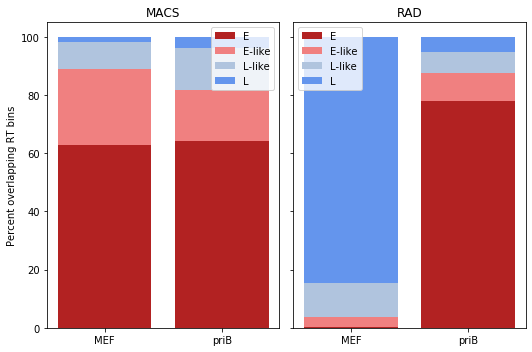

In [27]:
fig, axs = plt.subplots(1, 2, sharey = True)
colors = {'E': 'firebrick', 'E-like': 'lightcoral', 'L' : 'cornflowerblue', 'L-like': 'lightsteelblue'}
for ax, peaktype in zip(axs, ['MACS', 'RAD']):
    peakdata = agg_data.loc[peaktype, :].copy()
    for celltype in celltypes:
        peakdata.loc[(slice(None), celltype), 'percent'] = \
            peakdata.loc[(slice(None), celltype), 'chrom'] / peakdata.loc[(slice(None), celltype), 'chrom'].sum() * 100
    
    heights = np.zeros(shape = 2)
    for bintype, zorder in zip(['E', 'E-like', 'L-like', 'L'], range(4, 0, -1)):
        heights += peakdata.loc[bintype, 'percent'].values
        ax.bar(
            x = [0, 1],
            height = heights,
            zorder = zorder,
            color = colors[bintype],
            label = bintype
        )
        
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['MEF', 'priB'])
    ax.set_title(peaktype)

axs[0].set_ylabel('Percent overlapping RT bins')
fig.set_figwidth(7.5)
fig.set_figheight(5)
fig.tight_layout()
fig.savefig('percent_rtbins.pdf')